## Импорты

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import lightning.pytorch as pl

from lightning.pytorch import seed_everything
from torch.utils.data import DataLoader

from src import (
    get_param_for_normalize,
    make_dataset,
    DocImgDataset,
    ModelLight,
    plot_confusion_matrix,
    path_reduction,
)

seed_everything(42, workers=True)
root_project_path = path_reduction(1)

Global seed set to 42
Global seed set to 42


In [10]:
train, val, test = make_dataset(root_project_path=root_project_path)

absolute path to the project root folder: /home/gleb/study/mlopsproj


In [11]:
train

file_name  target      dataset
0           PMC5741840_00001.jpg       1  pub_lay_net
1           PMC4782288_00003.jpg       1  pub_lay_net
2      3465396606_5ba1574128.jpg       0        flick
3      3722572342_6904d11d52.jpg       0        flick
4      2533414541_362bf043bb.jpg       0        flick
...                          ...     ...          ...
14299       PMC6104845_00080.jpg       1  pub_lay_net
14300  2095078658_c14ba89bc2.jpg       0        flick
14301       PMC3113731_00008.jpg       1  pub_lay_net
14302  2632111399_b3c1630f8e.jpg       0        flick
14303               gcv85f00.png       1      tobacoo

[14304 rows x 3 columns]

In [12]:
train.sample(3)

file_name  target      dataset
9844      PMC4590935_00007.jpg       1  pub_lay_net
4509      PMC4829101_00003.jpg       1  pub_lay_net
1010  342872408_04a2832a1b.jpg       0        flick

In [13]:
train.shape, val.shape, test.shape

((14304, 3), (1789, 3), (1788, 3))

In [14]:
train["target"].value_counts()

target
1    7832
0    6472
Name: count, dtype: int64

In [15]:
train["dataset"].value_counts()

dataset
pub_lay_net    6816
flick          6472
tobacoo        1016
Name: count, dtype: int64

In [16]:
train_path = os.path.join(root_project_path, "data/interim/train.csv")
val_path = os.path.join(root_project_path, "data/interim/val.csv")
test_path = os.path.join(root_project_path, "data/interim/test.csv")
train.to_csv(train_path)
val.to_csv(val_path)
test.to_csv(test_path)

## Считаем нормализацию.

In [17]:
from PIL import Image

path = f"{root_project_path}/data/raw/flickr8k/images"
file_name = "667626_18933d713e.jpg"

path = f"{root_project_path}/data/raw/Tobacco 800 Dataset/tobacco800"
file_name = "aao54e00_1.png"


img = Image.open(f"{path}/{file_name}")
np.array(img.convert("L"))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
train = pd.read_csv(f"{root_project_path}/data/interim/train.csv")

train_data = DocImgDataset(train, normalize=None, transformer=None)

train_loader = DataLoader(train_data, batch_size=84, num_workers=12)

absolute path to the project root folder: /home/gleb/study/mlopsproj


In [19]:
get_param_for_normalize(train_loader, num_cn=1)

(7415193600.0, tensor([178.4238]), tensor([7237.1367]))

## Результат нормализации и трансформации

In [20]:
train = pd.read_csv(f"{root_project_path}/data/interim/train.csv")
train_data = DocImgDataset(train, return_orig=True)

valid = pd.read_csv(f"{root_project_path}/data/interim/val.csv")
valid_data = DocImgDataset(valid, return_orig=True)

it_train = iter(train_data)
it_valid = iter(valid_data)

absolute path to the project root folder: /home/gleb/study/mlopsproj
absolute path to the project root folder: /home/gleb/study/mlopsproj


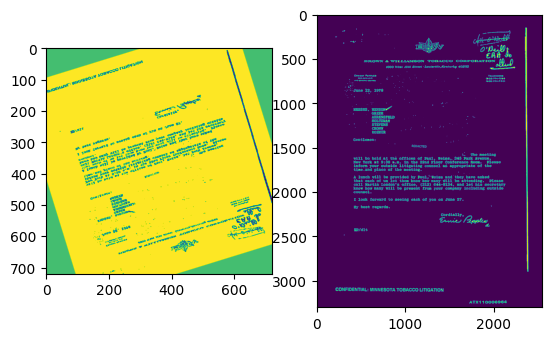

In [71]:
res = next(it_train)
fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.imshow(res["img_x"].permute(1, 2, 0))
ax2.imshow(res["img_orig"])

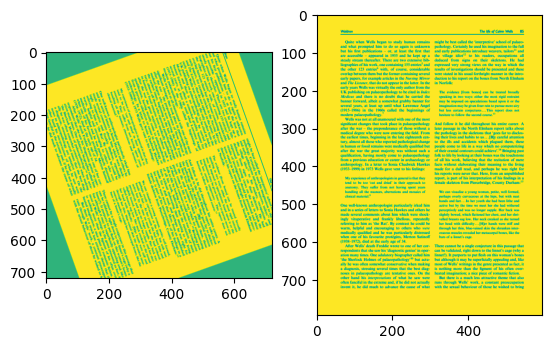

In [82]:
res = next(it_valid)
fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.imshow(res["img_x"].permute(1, 2, 0))
ax2.imshow(res["img_orig"])

In [59]:
res["img_x"][0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [60]:
res["img_orig"][0]

array([[255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [25

## Тестируем модель.

In [83]:
model = f"{root_project_path}/models/model_clf.ckpt"
test = pd.read_csv(f"{root_project_path}/data/interim/test.csv")
test_data = DocImgDataset(
    test,
    transformer=False,
)
test_loader = DataLoader(test_data, batch_size=84, num_workers=12)

absolute path to the project root folder: /home/gleb/study/mlopsproj


In [84]:
model = ModelLight.load_from_checkpoint(model, map_location="cpu")

ModuleNotFoundError: No module named 'code_prj'

In [26]:
trainer = pl.Trainer(devices=[1], enable_progress_bar=True, logger=False)
trainer.test(model, test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing DataLoader 0: 100%|██████████| 22/22 [00:11<00:00,  1.95it/s]


[{}]

In [28]:
model.test_metric

{'test_auc': tensor(1.0000),
 'test_accuracy': tensor(0.9966),
 'test_precision': tensor(0.9980),
 'test_recall': tensor(0.9959),
 'test_f1_score': tensor(0.9969)}

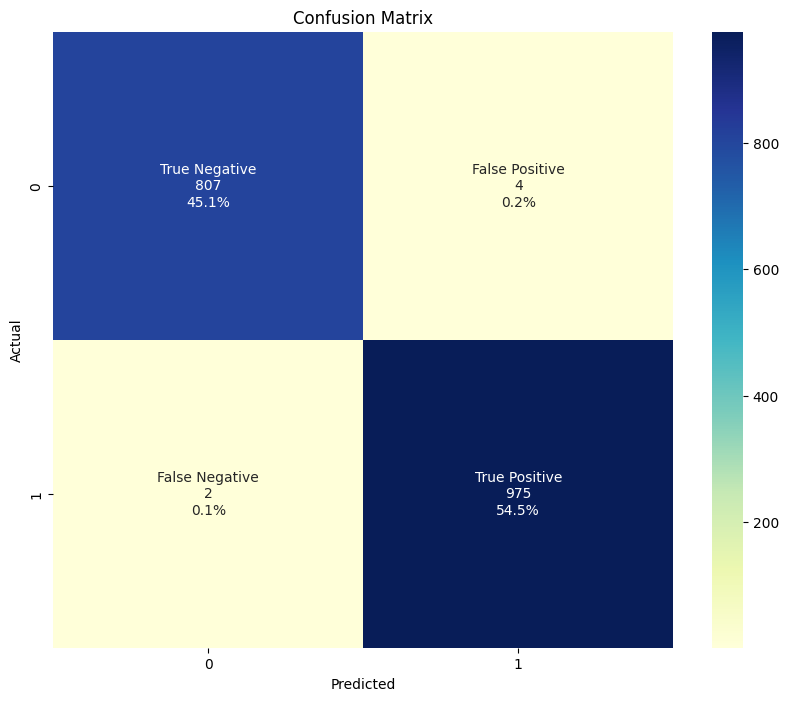

In [29]:
X, y = model.test_predict_list, model.test_target_list
plot_confusion_matrix(X, y)

/home/gleb/study/mlopsproj/reports/model_clf_conf_martix.png
cj[hfytybt]


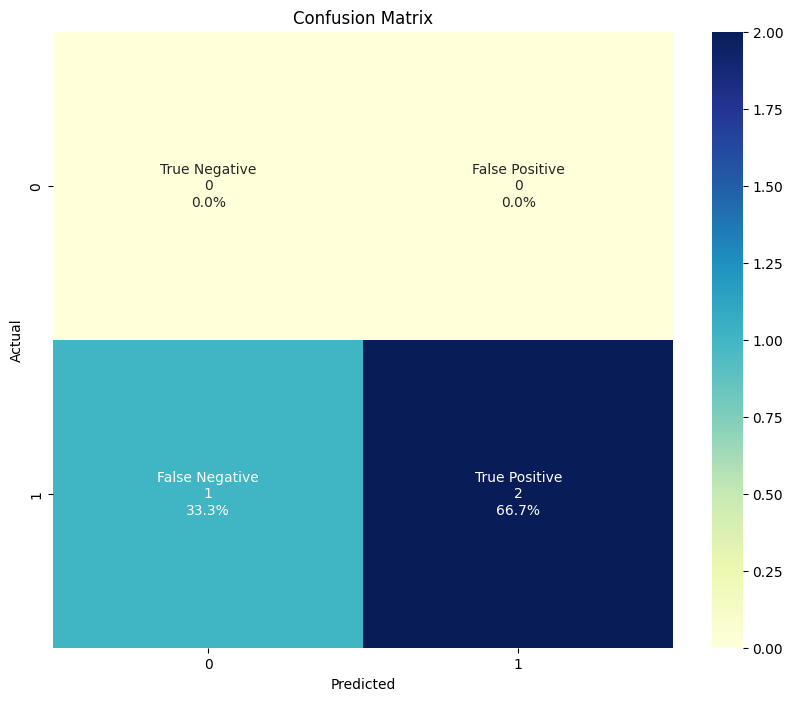

In [4]:
plot_confusion_matrix([1, 1, 1], [1, 0, 1], mode='show')

## Обработка изображений

In [69]:
from code_prj import ImageClf

ing = ImageClf(
    model="models/model_1.ckpt",
    batch_size=10,
    device=None,
    sort_in_dir=False,
    make_raport=False,
)
ing.run()

ModuleNotFoundError: No module named 'code_prj'